# Notebook Summary

* This notebook discusses the use of EarlyStoppingCallback.

* It discusses the various parameters of EarlyStoppingCallback.

In [ ]:
import pandas as pd

import matplotlib.pyplot as plt

import tensorflow as tf

In [ ]:
insurance = pd.read_csv("https://raw.githubusercontent.com/stedy/Machine-Learning-with-R-datasets/master/insurance.csv")

In [ ]:
from sklearn.compose import make_column_transformer

from sklearn.preprocessing import MinMaxScaler,OneHotEncoder

from sklearn.model_selection import train_test_split

In [ ]:
# Create a column transformer

ct = make_column_transformer(
    (MinMaxScaler(),["age","bmi","children"]),
    (OneHotEncoder(handle_unknown = "ignore"),["sex","smoker","region"])
)

# Creating x and y

x = insurance.drop("charges",axis = 1)
y = insurance["charges"]

x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.2,random_state = 42)

# Fit coulmn transformer to our training data
ct.fit(x_train)

# Transforming training and test data

x_train_normal = ct.transform(x_train)

x_test_normal = ct.transform(x_test)


In [ ]:
# Making the neural network

tf.random.set_seed(42)

# cretaing the model

new_model = tf.keras.Sequential([
    tf.keras.layers.Dense(100),
    tf.keras.layers.Dense(10),
    tf.keras.layers.Dense(1)
])

# compile

new_model.compile(loss = tf.keras.losses.mae,
                  optimizer = tf.keras.optimizers.Adam(),
                  metrics = ["mae"] )

# fit

new_model.fit(x_train_normal,y_train,epochs = 200)

Epoch 1/200
34/34 [==============================] - 1s 1ms/step - loss: 13296.4671 - mae: 13296.4671
Epoch 2/200
34/34 [==============================] - 0s 1ms/step - loss: 12948.4245 - mae: 12948.4245
Epoch 3/200
34/34 [==============================] - 0s 1ms/step - loss: 12705.2201 - mae: 12705.2201
Epoch 4/200
34/34 [==============================] - 0s 1ms/step - loss: 13369.7395 - mae: 13369.7395
Epoch 5/200
34/34 [==============================] - 0s 1ms/step - loss: 13230.8567 - mae: 13230.8567
Epoch 6/200
34/34 [==============================] - 0s 1ms/step - loss: 12995.1999 - mae: 12995.1999
Epoch 7/200
34/34 [==============================] - 0s 1ms/step - loss: 12876.1059 - mae: 12876.1059
Epoch 8/200
34/34 [==============================] - 0s 1ms/step - loss: 13004.0395 - mae: 13004.0395
Epoch 9/200
34/34 [==============================] - 0s 1ms/step - loss: 12508.0465 - mae: 12508.0465
Epoch 10/200
34/34 [==============================] - 0s 1ms/step - loss: 12304.99

In [ ]:
new_model.evaluate(x_test_normal,y_test)

9/9 [==============================] - 0s 1ms/step - loss: 3171.7632 - mae: 3171.7632


[3171.76318359375, 3171.76318359375]

# Early Stopping

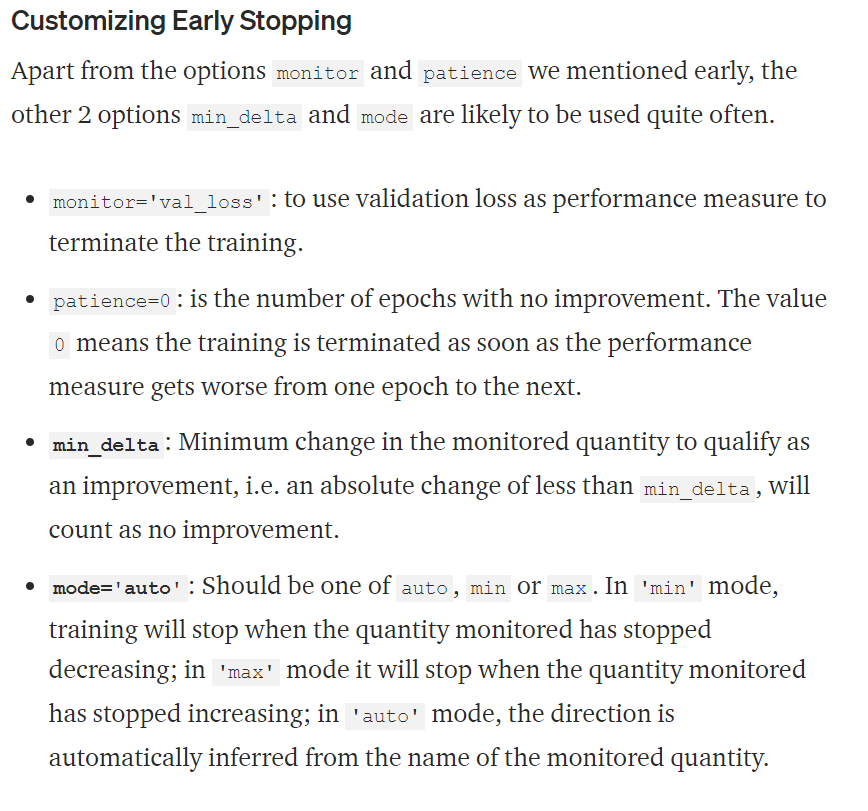

In [ ]:
from tensorflow.keras.callbacks import EarlyStopping
early_stopping = EarlyStopping(monitor='mae',patience=8,min_delta = 0.001,mode="auto")

In [ ]:
# same NN but using early stopping

tf.random.set_seed(42)

# cretaing the model

new_model = tf.keras.Sequential([
    tf.keras.layers.Dense(100),
    tf.keras.layers.Dense(10),
    tf.keras.layers.Dense(1)
])

# compile

new_model.compile(loss = tf.keras.losses.mae,
                  optimizer = tf.keras.optimizers.Adam(),
                  metrics = ["mae"] )

# fit

new_model.fit(x_train_normal,y_train,epochs = 200,callbacks=[early_stopping])

Epoch 1/200
34/34 [==============================] - 0s 1ms/step - loss: 13296.4671 - mae: 13296.4671
Epoch 2/200
34/34 [==============================] - 0s 1ms/step - loss: 12948.4245 - mae: 12948.4245
Epoch 3/200
34/34 [==============================] - 0s 1ms/step - loss: 12705.2201 - mae: 12705.2201
Epoch 4/200
34/34 [==============================] - 0s 1ms/step - loss: 13369.7395 - mae: 13369.7395
Epoch 5/200
34/34 [==============================] - 0s 1ms/step - loss: 13230.8567 - mae: 13230.8567
Epoch 6/200
34/34 [==============================] - 0s 2ms/step - loss: 12995.1999 - mae: 12995.1999
Epoch 7/200
34/34 [==============================] - 0s 1ms/step - loss: 12876.1059 - mae: 12876.1059
Epoch 8/200
34/34 [==============================] - 0s 1ms/step - loss: 13004.0395 - mae: 13004.0395
Epoch 9/200
34/34 [==============================] - 0s 1ms/step - loss: 12508.0465 - mae: 12508.0465
Epoch 10/200
34/34 [==============================] - 0s 1ms/step - loss: 12304.99